In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train_cv = X_train[:10000]
y_train_cv = y_train[:10000]


model = SVC()
parameters = { 'C': [5, 10, 50, 100],
            'kernel': ['rbf']}

        
tuned_model = GridSearchCV(model, parameters, cv=10, verbose=0)
tuned_model.fit(X_train_cv, y_train_cv.values.ravel())

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

Best Score: 0.967
Best Params:  {'C': 50, 'kernel': 'rbf'}


In [9]:
from sklearn import svm


#Create a svm Classifier
clf = svm.SVC(C=50,kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=50)

In [10]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.982


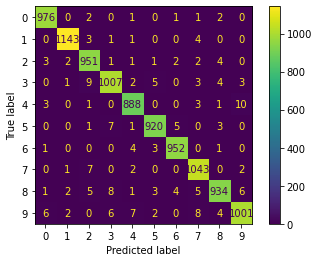

In [5]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[x for x in range(10)])
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)])
display.plot()